<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

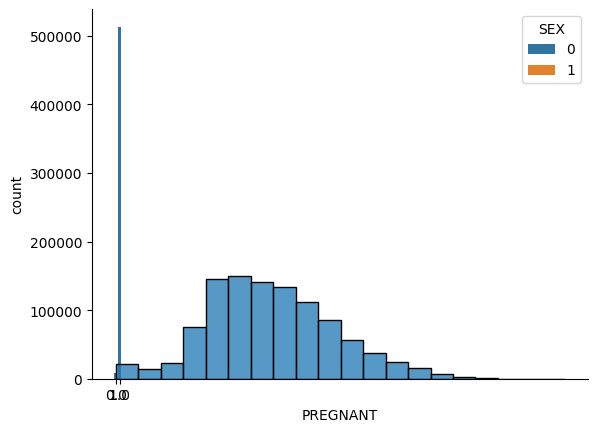

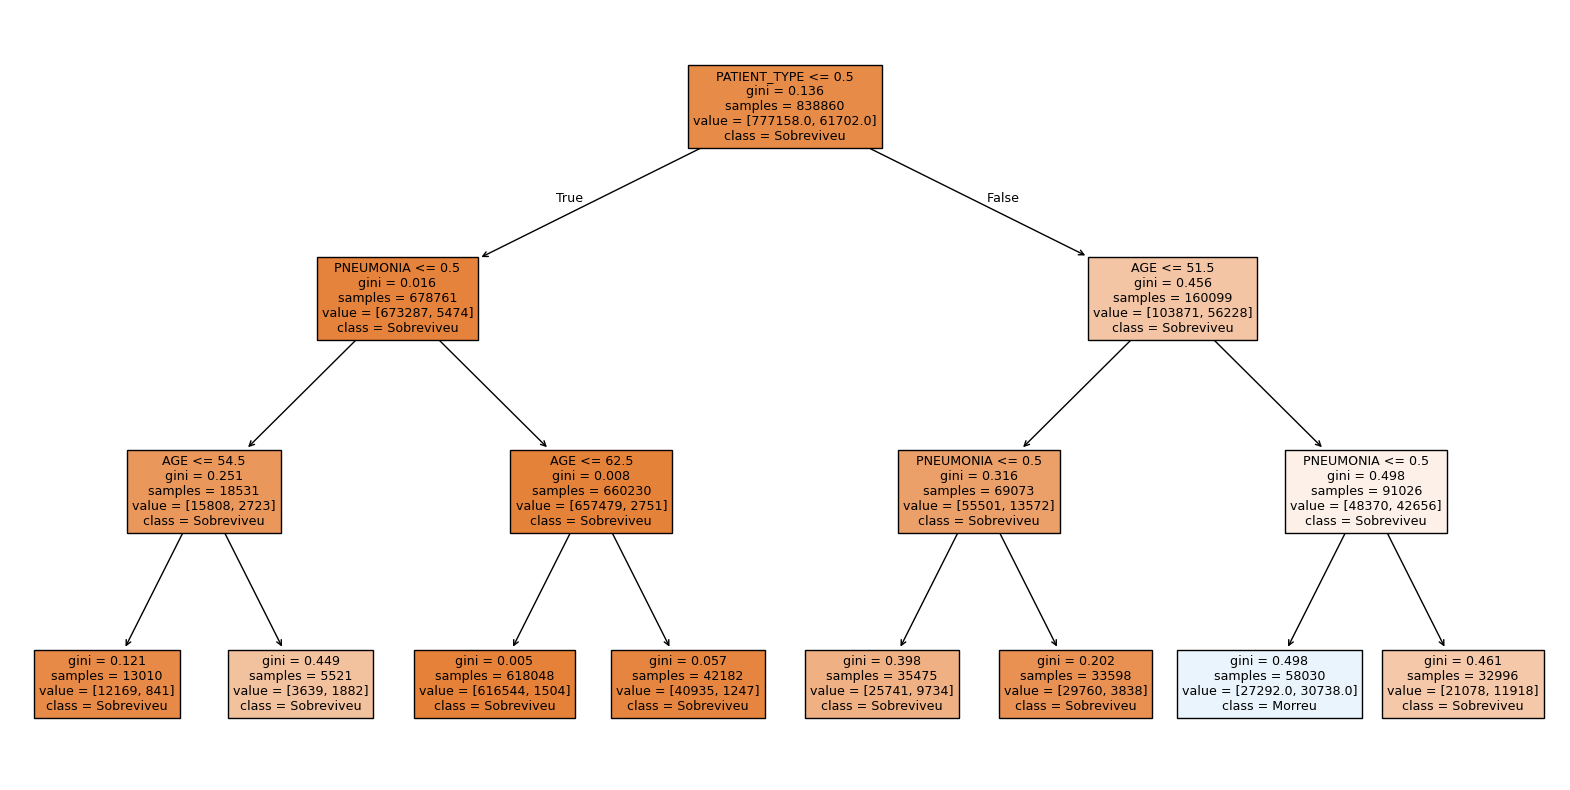

Profundidade 2: Acurácia de treino = 0.9264
Profundidade 3: Acurácia de treino = 0.9306
Profundidade 4: Acurácia de treino = 0.9327
Profundidade 5: Acurácia de treino = 0.9334


In [ ]:
#!unzip  Covid\data.zip

import pandas as pd #manipulacao  de dados tabulares
import matplotlib.pyplot as plt #computacao numerica
import numpy as np

#visualizacao
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text

#conjunto de modelos e pre-processamento do scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#####################

# 1. Carregando os dados
df = pd.read_csv("/content/Covid Data.csv")
df.sample(5)
df.shape
df.columns
df.info()


# pre-processamento dos dados
# criar a coluna DIED com base na coluna DATE_DIED
df['DIED'] = df['DATE_DIED'] != '9999-99-99'


df.columns

colunas_filtradas =[ ]

for c in df.columns:
  if c == 'AGE':
    continue
  colunas_filtradas.append(c)
print(colunas_filtradas)

#fazer compreensao de lista
colunas_filtradas = [c for c in df.columns if c != 'AGE']

df[colunas_filtradas]= df[colunas_filtradas]\
                          .replace({97:np.nan, 98:np.nan, 99:np.nan})
df[colunas_filtradas]= df[colunas_filtradas]\
                          .replace({2:1, 1:0})
df.describe().T #

sns.countplot(df, x= 'PREGNANT', hue= 'SEX')
df_clean = df.drop(columns=['PREGNANT']).dropna()
df.loc[df['SEX'] == 1, 'PREGNANT'] = 0
#divisao em X e Y
y= df['DIED']
x= df.drop(columns=['MEDICAL_UNIT', 'INTUBED','CLASIFFICATION_FINAL', 'DIED', 'DATE_DIED'])
print(x.shape)
print(y.shape)

clf =  DecisionTreeClassifier(max_depth=3).fit(x,y)
print(export_text(clf, feature_names=x.columns))

jonas = x.sample(random_state = 42)
jonas.T

clf.predict(jonas)

y.sample(random_state=42)

accuracy_score(y, clf.predict(x))
sns.histplot(df.AGE, bins =20)
sns.despine()

# 1. Separar treino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# 2. Treinar o modelo com dados de treino
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 3. Prever com os dados de teste
y_pred = clf.predict(X_test)


# 4. Avaliação
print("Acurácia no teste:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=x.columns, class_names=["Sobreviveu", "Morreu"], filled=True)
plt.show()

 # fazer um laco que treine diferentes arvores de decisao com max_depth indo  de 2 a 21,  esalvar acuracia
 #de treino dentro de  um vetor.  Depois vamos fazer um grafico com essas acuracias

# Lista para armazenar acurácias de treino
train_accuracies = []

# Loop de max_depth de 2 até 21
for depth in range(2, 22):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(acc)
    print(f"Profundidade {depth}: Acurácia de treino = {acc:.4f}")

# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(range(2, 22), train_accuracies, marker='o')
plt.plot(range(2, 22), y_train_pred, c='k')
plt.title("Acurácia no treino vs Profundidade da Árvore")
plt.xlabel("max_depth")
plt.ylabel("Acurácia (Treino)")
plt.grid(True)
plt.xticks(range(2, 22))
plt.show()

